In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [225]:
df = pd.read_csv('data.csv')
df

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22
0,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-28,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-29,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-30,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-31,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-09-01,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91895,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-03,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91896,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-04,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91897,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-05,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91898,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-06,NaN,0.28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
df.columns = df.columns.str.lower()
df

,station,name,date,awnd,prcp,snow,snwd,tavg,tmax,tmin,...,wt10,wt11,wt13,wt14,wt15,wt16,wt17,wt18,wt21,wt22
0,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-28,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-29,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-30,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-31,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-09-01,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91895,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-03,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91896,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-04,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91897,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-05,NaN,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91898,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-06,NaN,0.28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91900 entries, 0 to 91899
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  91900 non-null  object 
 1   name     91900 non-null  object 
 2   date     91900 non-null  object 
 3   awnd     15335 non-null  float64
 4   prcp     91325 non-null  float64
 5   snow     52798 non-null  float64
 6   snwd     10805 non-null  float64
 7   tavg     4487 non-null   float64
 8   tmax     15336 non-null  float64
 9   tmin     15354 non-null  float64
 10  wt01     3966 non-null   float64
 11  wt02     338 non-null    float64
 12  wt03     1950 non-null   float64
 13  wt04     46 non-null     float64
 14  wt05     252 non-null    float64
 15  wt06     70 non-null     float64
 16  wt07     100 non-null    float64
 17  wt08     1950 non-null   float64
 18  wt09     19 non-null     float64
 19  wt10     2 non-null      float64
 20  wt11     12 non-null     float64
 21  wt13     428

In [228]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

station    0.000000
name       0.000000
date       0.000000
awnd       0.833134
prcp       0.006257
snow       0.425484
snwd       0.882427
tavg       0.951175
tmax       0.833123
tmin       0.832927
wt01       0.956844
wt02       0.996322
wt03       0.978781
wt04       0.999499
wt05       0.997258
wt06       0.999238
wt07       0.998912
wt08       0.978781
wt09       0.999793
wt10       0.999978
wt11       0.999869
wt13       0.995343
wt14       0.998575
wt15       0.999967
wt16       0.993580
wt17       0.999978
wt18       0.999630
wt21       0.999978
wt22       0.999956
dtype: float64

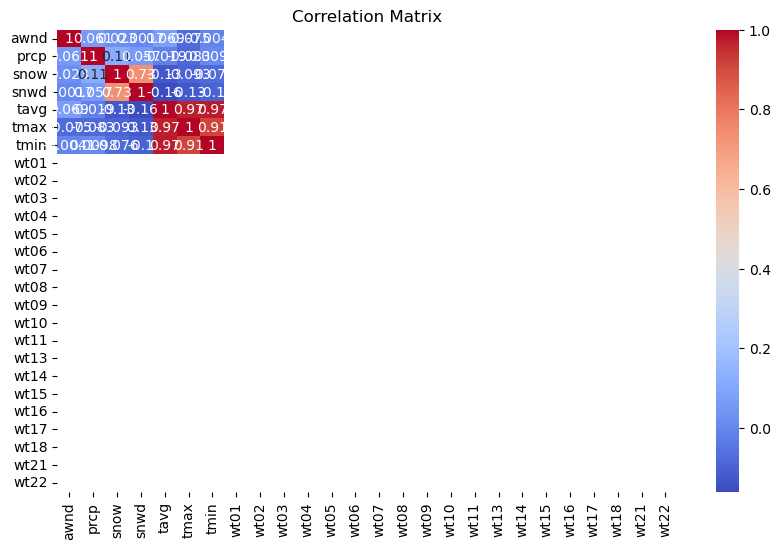

In [229]:
num_cols = df.drop(columns=['station','name','date'])
correlation = num_cols.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [230]:
df.drop(
    columns=['wt01','wt02','wt03','wt04','wt05','wt06','wt07','wt08','wt09','wt10','wt11','wt13','wt14','wt15','wt16','wt17','wt18','wt21','wt22'],
            inplace=True
)
df

,station,name,date,awnd,prcp,snow,snwd,tavg,tmax,tmin
0,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-28,NaN,0.00,0.0,NaN,NaN,NaN,NaN
1,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-29,NaN,0.00,0.0,NaN,NaN,NaN,NaN
2,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-30,NaN,0.00,0.0,NaN,NaN,NaN,NaN
3,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-31,NaN,0.00,0.0,NaN,NaN,NaN,NaN
4,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-09-01,NaN,0.00,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
91895,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-03,NaN,0.00,0.0,NaN,NaN,NaN,NaN
91896,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-04,NaN,0.00,0.0,NaN,NaN,NaN,NaN
91897,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-05,NaN,0.00,0.0,NaN,NaN,NaN,NaN
91898,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-06,NaN,0.28,NaN,NaN,NaN,NaN,NaN


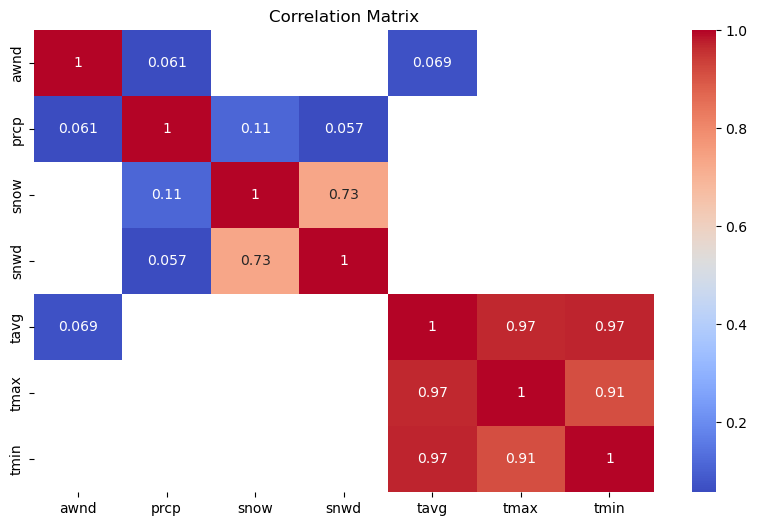

In [231]:
num_cols = df.drop(columns=['station','name','date'])
correlation = num_cols.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation[correlation > .05],annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [232]:
df = df.copy()

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91900 entries, 0 to 91899
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  91900 non-null  object 
 1   name     91900 non-null  object 
 2   date     91900 non-null  object 
 3   awnd     15335 non-null  float64
 4   prcp     91325 non-null  float64
 5   snow     52798 non-null  float64
 6   snwd     10805 non-null  float64
 7   tavg     4487 non-null   float64
 8   tmax     15336 non-null  float64
 9   tmin     15354 non-null  float64
dtypes: float64(7), object(3)
memory usage: 7.0+ MB


In [234]:
null_pct = df.apply(pd.isnull).sum() / df.shape[0]
null_pct

station    0.000000
name       0.000000
date       0.000000
awnd       0.833134
prcp       0.006257
snow       0.425484
snwd       0.882427
tavg       0.951175
tmax       0.833123
tmin       0.832927
dtype: float64

In [235]:
df.drop(df.columns[null_pct > .9],axis=1,inplace=True)
df

,station,name,date,awnd,prcp,snow,snwd,tmax,tmin
0,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-28,NaN,0.00,0.0,NaN,NaN,NaN
1,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-29,NaN,0.00,0.0,NaN,NaN,NaN
2,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-30,NaN,0.00,0.0,NaN,NaN,NaN
3,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-08-31,NaN,0.00,0.0,NaN,NaN,NaN
4,US1TXDA0021,"RICHARDSON 1.7 WSW, TX US",2008-09-01,NaN,0.00,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
91895,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-03,NaN,0.00,0.0,NaN,NaN,NaN
91896,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-04,NaN,0.00,0.0,NaN,NaN,NaN
91897,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-05,NaN,0.00,0.0,NaN,NaN,NaN
91898,US1TXDA0091,"GARLAND 2.5 NW, TX US",2018-12-06,NaN,0.28,NaN,NaN,NaN,NaN


In [236]:
df.dropna(subset=['tmax','tmin','prcp'],inplace=True)

In [238]:
df[['awnd','snow','snwd']] = df[['awnd','snow','snwd']].ffill().bfill()

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15274 entries, 36392 to 83551
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  15274 non-null  object 
 1   name     15274 non-null  object 
 2   date     15274 non-null  object 
 3   awnd     15274 non-null  float64
 4   prcp     15274 non-null  float64
 5   snow     15274 non-null  float64
 6   snwd     15274 non-null  float64
 7   tmax     15274 non-null  float64
 8   tmin     15274 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


In [240]:
df.dtypes

station     object
name        object
date        object
awnd       float64
prcp       float64
snow       float64
snwd       float64
tmax       float64
tmin       float64
dtype: object

In [241]:
# set the index to date
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'],inplace=True)
df

,station,name,date,awnd,prcp,snow,snwd,tmax,tmin
date,,,,,,,,,
2022-05-01,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-01,5.14,0.00,0.0,0.0,84.0,51.0
2022-05-02,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-02,12.53,0.49,0.0,0.0,85.0,65.0
2022-05-03,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-03,6.93,0.56,0.0,0.0,76.0,56.0
2022-05-04,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-04,7.38,0.00,0.0,0.0,86.0,59.0
2022-05-05,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-05,6.26,0.59,0.0,0.0,76.0,57.0
...,...,...,...,...,...,...,...,...,...
2025-07-07,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0
2025-07-08,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0
2025-07-09,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0


In [242]:
df['target'] = df.shift(-1)['tmax']
df

,station,name,date,awnd,prcp,snow,snwd,tmax,tmin,target
date,,,,,,,,,,
2022-05-01,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-01,5.14,0.00,0.0,0.0,84.0,51.0,85.0
2022-05-02,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-02,12.53,0.49,0.0,0.0,85.0,65.0,76.0
2022-05-03,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-03,6.93,0.56,0.0,0.0,76.0,56.0,86.0
2022-05-04,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-04,7.38,0.00,0.0,0.0,86.0,59.0,76.0
2022-05-05,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-05,6.26,0.59,0.0,0.0,76.0,57.0,83.0
...,...,...,...,...,...,...,...,...,...,...
2025-07-07,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0,96.0
2025-07-08,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0,94.0
2025-07-09,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0,94.0


In [247]:
df = df.ffill()
df

,station,name,date,awnd,prcp,snow,snwd,tmax,tmin,target
date,,,,,,,,,,
2022-05-01,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-01,5.14,0.00,0.0,0.0,84.0,51.0,85.0
2022-05-02,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-02,12.53,0.49,0.0,0.0,85.0,65.0,76.0
2022-05-03,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-03,6.93,0.56,0.0,0.0,76.0,56.0,86.0
2022-05-04,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-04,7.38,0.00,0.0,0.0,86.0,59.0,76.0
2022-05-05,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-05,6.26,0.59,0.0,0.0,76.0,57.0,83.0
...,...,...,...,...,...,...,...,...,...,...
2025-07-07,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0,96.0
2025-07-08,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0,94.0
2025-07-09,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0,94.0


In [248]:
 r = Ridge(alpha=.1)

In [249]:
predictors = df.columns[~df.columns.isin(['name','station','target','date'])]
predictors

Index(['awnd', 'prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [250]:
def backtest(df,model,predictors, start=2500, step=90):
    all_predictions = []
    for i in range(start,df.shape[0],step):
        train = df.iloc[:i,:]
        test = df.iloc[i:(i+step),:]
        model.fit(train[predictors],train['target'])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds,index=test.index)
        combined = pd.concat([test['target'],preds],axis=1)
        combined.columns = ['actual','predicted']
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [251]:
predictions = backtest(df,r,predictors)
predictions

,actual,predicted
date,,
2011-06-14,99.0,96.402213
2011-06-15,101.0,96.540503
2011-06-16,103.0,95.891944
2011-06-17,103.0,96.037199
2011-06-18,103.0,96.270703
...,...,...
2025-07-07,96.0,91.541129
2025-07-08,94.0,93.696668
2025-07-09,94.0,92.539879


In [255]:
mean_absolute_error(predictions['actual'],predictions['predicted'])

5.090887125681965

In [258]:
def pct_diff(old,new):
    return (new - old) / old

def compute_rolling(df,horizon,col):
    label = f"rolling_{horizon}_{col}"
    df[label] = df[col].rolling(horizon).mean()
    df[f"{label}_pct"] = pct_diff(df[label],df[col])
    return df
rolling_horizon = [3,14]
for horizon in rolling_horizon:
    for col in ['tmax','tmin','prcp']:
        df = compute_rolling(df,horizon,col)

In [259]:
df

,station,name,date,awnd,prcp,snow,snwd,tmax,tmin,target,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
date,,,,,,,,,,,,,,,,,,,,,
2022-05-01,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-01,5.14,0.00,0.0,0.0,84.0,51.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-02,12.53,0.49,0.0,0.0,85.0,65.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-03,6.93,0.56,0.0,0.0,76.0,56.0,86.0,...,57.333333,-0.023256,0.350000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-04,7.38,0.00,0.0,0.0,86.0,59.0,76.0,...,60.000000,-0.016667,0.350000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-05,6.26,0.59,0.0,0.0,76.0,57.0,83.0,...,57.333333,-0.005814,0.383333,0.539130,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0,96.0,...,72.333333,-0.004608,0.000000,NaN,92.642857,-0.028527,73.285714,-0.017544,0.012143,-1.00
2025-07-08,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0,94.0,...,71.666667,-0.023256,0.130000,2.000000,93.357143,0.028309,73.214286,-0.043902,0.040000,8.75
2025-07-09,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0,94.0,...,70.666667,-0.009434,0.316667,0.768421,93.285714,0.007657,72.857143,-0.039216,0.080000,6.00


In [260]:
df = df.iloc[14:,:]

In [261]:
df = df.fillna(0)

In [264]:
def expand_mean(df):
    return df.expanding().mean()

for col in ['tmax','tmin','prcp']:
    df[f"month_avg_{col}"] = df[col].groupby(df.index.month,group_keys=False).transform(expand_mean)
    df[f"day_avg_{col}"] = df[col].groupby(df.index.day_of_year,group_keys=False).transform(expand_mean)

In [266]:
df

,station,name,date,awnd,prcp,snow,snwd,tmax,tmin,target,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2022-05-15,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-15,7.61,0.00,0.0,0.0,93.0,67.0,90.0,...,64.928571,0.031903,0.117143,-1.00,93.000000,93.000000,67.000000,67.000000,0.000000,0.000000
2022-05-16,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-16,4.70,0.00,0.0,0.0,90.0,65.0,93.0,...,64.928571,0.001100,0.082143,-1.00,91.500000,90.000000,66.000000,65.000000,0.000000,0.000000
2022-05-17,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-17,8.05,0.00,0.0,0.0,93.0,70.0,95.0,...,65.928571,0.061755,0.042143,-1.00,92.000000,93.000000,67.333333,70.000000,0.000000,0.000000
2022-05-18,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-18,10.51,0.00,0.0,0.0,95.0,71.0,92.0,...,66.785714,0.063102,0.042143,-1.00,92.750000,95.000000,68.250000,71.000000,0.000000,0.000000
2022-05-19,USW00053975,"LANCASTER AIRPORT, TX US",2022-05-19,14.32,0.00,0.0,0.0,92.0,71.0,93.0,...,67.785714,0.047418,0.000000,0.00,92.600000,92.000000,68.800000,71.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-07,5.82,0.00,0.0,0.0,90.0,72.0,96.0,...,73.285714,-0.017544,0.012143,-1.00,96.638009,95.695652,76.647059,75.391304,0.050053,0.062391
2025-07-08,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-08,6.04,0.39,0.0,0.0,96.0,70.0,94.0,...,73.214286,-0.043902,0.040000,8.75,96.637528,96.782609,76.642050,76.739130,0.050309,0.135652
2025-07-09,USW00053970,"MESQUITE METRO AIRPORT, TX US",2025-07-09,5.37,0.56,0.0,0.0,94.0,70.0,94.0,...,72.857143,-0.039216,0.080000,6.00,96.635542,94.652174,76.637048,76.260870,0.050693,0.085870


In [276]:
predictors = df.columns[~df.columns.isin(['date','name','station','target'])]
predictions = backtest(df,r,predictors)
mean_absolute_error(predictions['actual'],predictions['predicted'])

4.789216097471515

In [278]:
predictions['diff'] = abs(predictions['actual'] - predictions['predicted'])
sort = predictions.sort_values('diff',ascending=False)
sort

,actual,predicted,diff
date,,,
2018-01-21,99.0,62.436942,36.563058
2024-01-13,23.0,58.033346,35.033346
2024-01-13,24.0,58.209341,34.209341
2016-12-17,29.0,62.254753,33.254753
2023-01-28,31.0,64.254382,33.254382
...,...,...,...
2012-12-03,73.0,72.998950,0.001050
2021-11-03,59.0,58.999244,0.000756
2025-06-19,92.0,91.999270,0.000730


In [283]:
predictions['diff'].round().value_counts().sort_index()

diff
0.0     1030
1.0     2077
2.0     1735
3.0     1505
4.0     1207
5.0      996
6.0      802
7.0      688
8.0      544
9.0      505
10.0     363
11.0     281
12.0     204
13.0     188
14.0     141
15.0     104
16.0      90
17.0      66
18.0      64
19.0      40
20.0      31
21.0      23
22.0      12
23.0      23
24.0      13
25.0       7
26.0       8
27.0       2
28.0       3
32.0       1
33.0       4
34.0       1
35.0       1
37.0       1
Name: count, dtype: int64